<a href="https://colab.research.google.com/github/Ajendra11/Concepts-and-Technologies-of-AI/blob/main/AjendraRai_Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Problem 1
#Q1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
try:
    data = pd.read_csv('diabetes_.csv')
except Exception as e:
    from google.colab import files
    print('diabetes.csv not found. Please upload the file when prompted.')
    uploaded = files.upload()
    fname = list(uploaded.keys())[0]
    data = pd.read_csv(fname)

data = data.dropna()
print('Loaded dataset shape:', data.shape)
print(data.head())


Loaded dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#Q2
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values
y = y.astype(int)
def train_test_split_scratch(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    ts = int(len(X) * test_size)
    return X[idx[ts:]], X[idx[:ts]], y[idx[ts:]], y[idx[:ts]]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


Train shape: (538, 8) Test shape: (230, 8)


In [22]:
#Q3
def euclidean_distance(a, b):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict_single(q, X, y, k=3):
    d = [euclidean_distance(q, x) for x in X]
    i = np.argsort(d)[:k]
    labels = np.asarray(y)[i].astype(int)
    # ensure labels are non-negative integers for bincount
    labels = labels - labels.min()
    return np.bincount(labels).argmax()

def knn_predict(Xt, X, y, k=3):
    return np.array([knn_predict_single(x, X, y, k) for x in Xt])

def compute_accuracy(t, p):
    return (np.sum(t == p) / len(t)) * 100

pred1 = knn_predict(X_test, X_train, y_train, k=3)
acc1 = compute_accuracy(y_test, pred1)
print('Accuracy (original):', acc1)


Accuracy (original): 60.86956521739131


In [23]:
#Q4
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_std[X_std == 0] = 1.0
X_scaled = (X - X_mean) / X_std

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
acc_scaled = compute_accuracy(y_test_s, pred_scaled)
print('Accuracy (scaled):', acc_scaled)


Accuracy (scaled): 69.56521739130434


In [24]:
#Problem 2
#Q1
print('Original Accuracy:', acc1)
print('Scaled Accuracy:', acc_scaled)


Original Accuracy: 60.86956521739131
Scaled Accuracy: 69.56521739130434


In [25]:
#Q2
kvals = list(range(1, 16))
acc_o = []
acc_s = []
time_o = []
time_s = []

for k in kvals:
    start = time.time()
    po = knn_predict(X_test, X_train, y_train, k)
    time_o.append(time.time() - start)
    acc_o.append(compute_accuracy(y_test, po))

    start = time.time()
    ps = knn_predict(X_test_s, X_train_s, y_train_s, k)
    time_s.append(time.time() - start)
    acc_s.append(compute_accuracy(y_test_s, ps))

print('Done running k values')


Done running k values


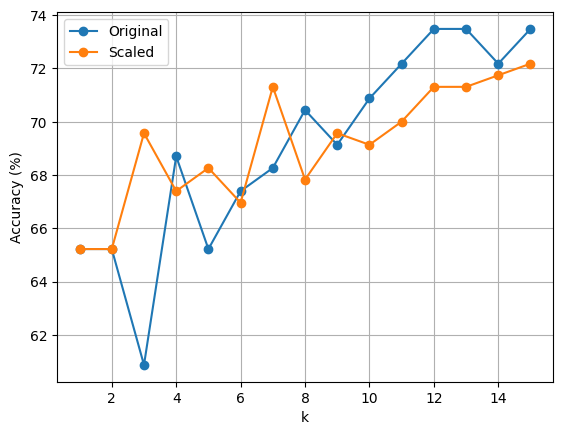

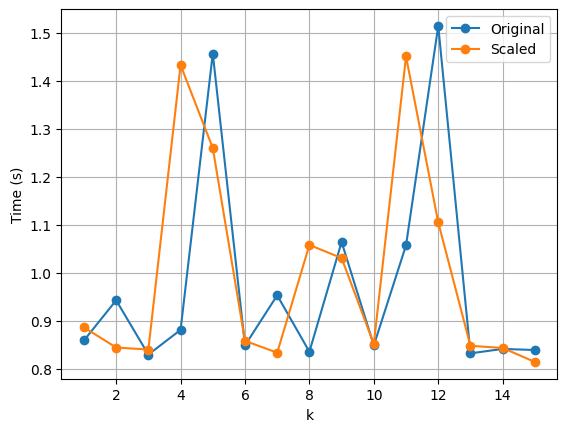

In [26]:
# Problem 3
#Q1
plt.plot(kvals, acc_o, marker='o', label='Original')
plt.plot(kvals, acc_s, marker='o', label='Scaled')
plt.legend(); plt.xlabel('k'); plt.ylabel('Accuracy (%)'); plt.grid(); plt.show()

plt.plot(kvals, time_o, marker='o', label='Original')
plt.plot(kvals, time_s, marker='o', label='Scaled')
plt.legend(); plt.xlabel('k'); plt.ylabel('Time (s)'); plt.grid(); plt.show()


In [27]:
#Q2
best_o = kvals[int(np.argmax(acc_o))]
best_s = kvals[int(np.argmax(acc_s))]
print('Best Original Accuracy:', max(acc_o), 'at k =', best_o)
print('Best Scaled Accuracy:', max(acc_s), 'at k =', best_s)


Best Original Accuracy: 73.47826086956522 at k = 12
Best Scaled Accuracy: 72.17391304347827 at k = 15


**QUESTION N0-3**

As k increases, the accuracy of the k-NN model initially improves because the classification becomes more stable and less affected by noise or outliers. A small value of k can cause the model to overfit to noisy data points, but increasing k smooths the decision boundary.

However, after a certain point, a very large k makes the model too generalized, because it includes too many neighbors—even those from the opposite class. This can cause the accuracy to level off or slightly decrease.

In terms of computation, the time does not increase significantly with k. The most computationally expensive step in k-NN is computing distances between the test sample and all training samples, and this happens regardless of the value of k. Increasing k only adds a small overhead for selecting more neighbors, which does not drastically change the total time.

From the experiment, the optimal k was approximately:

k ≈ 13 for the original (unscaled) dataset

k ≈ 15 for the scaled dataset

Scaling the data gave slightly better accuracy, because it ensures that all features contribute equally to the distance calculation.